<a href="https://colab.research.google.com/github/SuTunzer/python-docs-hello-world/blob/master/SugarSpice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# define global

import matplotlib.pyplot as plt
import numpy as np
import time
import random

Bounds = int(16)


In [22]:
from numpy.random.mtrand import rand
# Create a class agent

class agent(object):

    # Constructor
    def __init__(self, x=3, y=3, food = 10):
        self.x = x
        self.y = y
        self.food = food
       

    def look_move(self,arrayInput):
        maxfood = 0
        maxfood_direction_y  = 0
        maxfood_direction_x  = 0

        # look for max food direction to go 
        for ly in range(-1,2,1):
            for lx in range(-1,2,1):
                if self.y + ly < Bounds and self.y + ly > 0:
                    if self.x + lx < Bounds and self.x + lx > 0:
                        #print(arrayInput[self.y + ly,self.x + lx])
                        if arrayInput[self.y + ly,self.x + lx] > maxfood:
                            #print("found food")
                            maxfood = arrayInput[self.y + ly,self.x + lx]
                            maxfood_direction_y = ly
                            maxfood_direction_x = lx

        #now move the agent in that direction, unles don't know then go random
        if maxfood == 0:
            ty = random.randrange(-1, 2)
            if self.y + ty < 0 or self.y + ty > Bounds -1:
                ty =0
            tx = random.randrange(-1, 2)
            if self.x + tx < 0 or self.x + tx > Bounds-1:
                tx =0
            self.y = self.y + ty
            self.x = self.x + tx
            #print("move randolmy" + str(ty)+ ", " + str(tx))
            #print("new locoation" + str(self.y)+ ", " + str(self.x))
        else:
            self.y = self.y + maxfood_direction_y
            self.x = self.x + maxfood_direction_x

    def pickup_food(self, arrayInput):
        if arrayInput[self.y,self.x] > 0:
            self.food = self.food + arrayInput[self.y,self.x]
            arrayInput[self.y,self.x] = 0 

    def eat(self):
        self.food = self.food -1
        if obj.food < 0:
            list.pop(list_location)
    
    def breed(self):
        if self.food > 20:
            list.append(agent(self.y, self.x, int(self.food / 2)))
            self.food = int(self.food / 2)


1


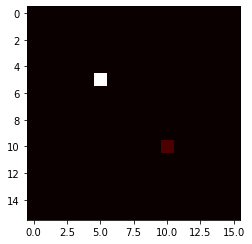

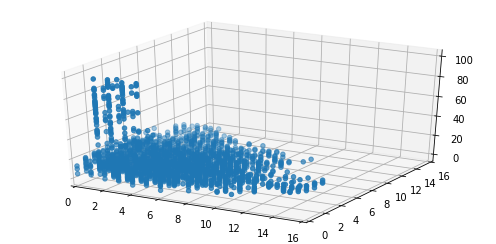

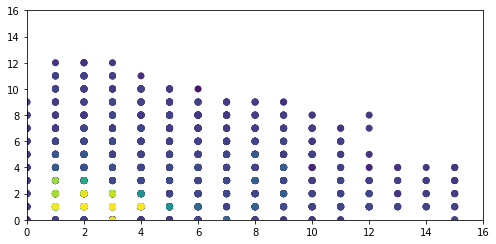

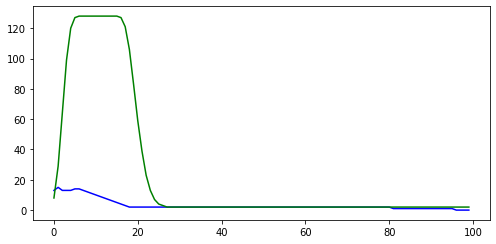

In [23]:
iterations = 100

#array = np.random.random((Bounds, Bounds))
#array.fill(7)#
array = np.zeros((Bounds, Bounds))
array_display = np.zeros((Bounds, Bounds))
array_path = np.zeros((Bounds, Bounds, iterations))
t_var = np.zeros(iterations)
t_var2 = np.zeros(iterations)

array[5,5] = 2000
array[10,10] = 200

list = [] 

# appending agents
list.append(agent(5, 5, 12))
print(len(list))

#list.pop(0)
#list.append( agent(10, 2, 10))

plt.imshow(array, cmap='hot', interpolation='nearest')
plt.show()

#array.fill(0)
#print(array[5,5])

for t in range(iterations):
    #array_display = np.round(array_display/1.01, 6)
    list_location = 0
    for obj in list:
        obj.look_move(array)
        obj.pickup_food(array)
        
        # display array path 
        array_display[obj.y,obj.x] = array_display[obj.y,obj.x] +1
        #print("Agent "  +str(t) + ": " + str(obj.y) + ", " +str(obj.x))
        array_path[obj.y,obj.x,t] = 1
        obj.eat()
        obj.breed()
        
        t_var[t] = obj.food
        t_var2[t] = len(list)

    for yfood in range(Bounds-1):
        for xfood in range(Bounds):
            a=1
            array[yfood,xfood] = random.randrange(0, 2)

        for obj2 in list:
            if obj2.x > 1:
                #print("Agent location " + str(obj2.x))
                 a = 1
        list_location = list_location + 1

    #t_var[t] = array[10,10]

#plt.imshow(array_display, cmap='hot')
##plt.show()

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = np.random.random(size=(3, 3, 3))
y,x,z  = array_path.nonzero()
ax.scatter(x,y,z, cmap='hot')
plt.xlim([0, Bounds])
plt.ylim([0, Bounds])
plt.show()

plt.scatter(x, y, c=z, cmap='viridis')
plt.xlim([0, Bounds])
plt.ylim([0, Bounds])
plt.show()

plt.plot(t_var, 'b')
plt.plot(t_var2, 'g') #'number of agents'
plt.show()


#print(array)

#from matplotlib.colors import ListedColormap
#cmap=ListedColormap(["red", "blue", "green", "black"])
#plt.imshow(array, cmap=cmap)
# Loop over data dimensions and create text annotations.
#for i in range(len(array)):
#   for j in range(len(array[1])): 
#       text = plt.text(j, i, array[i, j],ha="center", va="center", color='white')
